# Cinemática inversa de un manipulador RR de 2 GDL

De la cinemática directa del manipulador RR sabemos que:

$$ x = l_2 \cos(\theta_1 + \theta_2) + l_1 \cos\theta_1 $$
$$ y = l_2 \sin(\theta_1 + \theta_2) + l_1 \sin\theta_1 $$

Elevando al cuadrado cada miembro de las ecuaciones anteriores y sumándolas, se tiene:

$$ x^2 + y^2 = \left( l_2 \cos(\theta_1 + \theta_2) + l_1 \cos\theta_1 \right)^2 + 
\left( l_2 \sin(\theta_1 + \theta_2) + l_1 \sin\theta_1 \right)^2 $$

Simplificando términos:

$$ x^2 + y^2 = l_1^2 + l_2^2 + 2 l_1 l_2 \cos\theta_2 $$

$$ \cos\theta_2 = \frac{x^2 + y^2 - l_1^2 - l_2^2  }{2 l_1 l_2} = K $$

Además, sabemos que: 

$$ u = \arctan\left(\frac{\sin u}{\cos u}\right) \qquad y \qquad \sin u = \pm \sqrt{1-\cos^2 u} $$

De tal manera que podemos escribir $\theta_2$ en términos de la función arcotangente, como sigue:

$$ \theta_2 = \arctan\left(\frac{\pm\sqrt{1-K^2}}{K}\right) $$

Para calcular $\theta_1$, de las ecuaciones para $x$ e $y$ podemos expresar el cociente $y/x$ y trabajar con la expresión resultante:

$$ \frac{y}{x} = \frac{l_2 \sin(\theta_1 + \theta_2) + l_1 \sin\theta_1 }{ l_2 \cos(\theta_1 + \theta_2) + l_1 \cos\theta_1 } $$

Factorizando y simplificando los términos para $\cos\theta_1$ y $\sin\theta_1$, podemos escribir:

$$ \theta_1 = \arctan\left( \frac{l_2 y \cos\theta_2 + l_1 y - l_2 x \sin\theta_2}{l_2 x \cos\theta_2 + l_1 x + l_2 y \sin\theta_2} \right) $$

In [3]:
# K = (x**2 + y**2 - l1**2 - l2**2)/(2*l1*l2)
# t2 = arctan2(sqrt(1-(K**2)), K)
# t1 = arctan2(l2*y*cos(t2) + l1*y - l2*x*sin(t2), l2*x*cos(t2) + l1*x + l2*y*sin(t2))

In [18]:
from rkd.didactic import *
import numpy as np

In [36]:
l1 = 100
l2 = 100
rb = Robot((l1,0,0,t1), (l2,0,0,t2))

In [37]:
T = rb.T

In [38]:
Oe = T[:2, 3]
O1 = rb.Ts[0][:2,3]

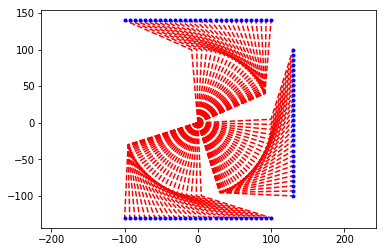

In [76]:
x1 = np.linspace(-100,100,10)
x2 = np.ones_like(x1)*130
x3 = np.linspace(-100,100,10)
y1 = np.ones_like(x1)*140
y2 = np.linspace(-100,100,10)
y3 = np.ones_like(x1)*-130
X = np.concatenate((x1,x2,x3))
Y = np.concatenate((y1,y2,y3))

for k,x in enumerate(X):
    y = Y[k]
    K = (x**2 + y**2 - l1**2 - l2**2)/(2*l1*l2)
    T2 = atan2(sqrt(1-(K**2)), K)
    T1 = atan2(l2*y*cos(t2) + l1*y - l2*x*sin(t2), l2*x*cos(t2) + l1*x + l2*y*sin(t2))
    valores = {t1:T1, t2:T2}
    OeN = Oe.subs(valores)
    O1N = O1.subs(valores)
    plt.plot([0, O1N[0], OeN[0]], [0, O1N[1], OeN[1]], "r--")
    plt.plot([OeN[0]], [OeN[1]], "b.")
    plt.axis("equal")